In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [45]:
pip install ucimlrepo

In [46]:
pd.set_option('display.max_columns',None)

In [47]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
df = fetch_ucirepo(id=17)

# data (as pandas dataframes)
features = df.data.features
target = df.data.targets

# # metadata
# print(df.metadata)

# # variable information
# print(df.variables)


# data preparation

In [48]:
features.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [49]:
features.sample(5)

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
141,16.11,18.05,105.10,813.0,0.09721,0.11370,0.09447,0.059430,0.1861,0.06248,0.7049,1.332,4.533,74.08,0.006770,0.019380,0.030670,0.011670,0.01875,0.003434,19.92,25.27,129.00,1233.0,0.1314,0.22360,0.28020,0.12160,0.2792,0.08158
165,14.97,19.76,95.50,690.2,0.08421,0.05352,0.01947,0.019390,0.1515,0.05266,0.1840,1.065,1.286,16.64,0.003634,0.007983,0.008268,0.006432,0.01924,0.001520,15.98,25.82,102.30,782.1,0.1045,0.09995,0.07750,0.05754,0.2646,0.06085
144,10.75,14.97,68.26,355.3,0.07793,0.05139,0.02251,0.007875,0.1399,0.05688,0.2525,1.239,1.806,17.74,0.006547,0.017810,0.020180,0.005612,0.01671,0.002360,11.95,20.72,77.79,441.2,0.1076,0.12230,0.09755,0.03413,0.2300,0.06769
171,13.43,19.63,85.84,565.4,0.09048,0.06288,0.05858,0.034380,0.1598,0.05671,0.4697,1.147,3.142,43.40,0.006003,0.010630,0.021510,0.009443,0.01520,0.001868,17.98,29.87,116.60,993.6,0.1401,0.15460,0.26440,0.11600,0.2884,0.07371
381,11.04,14.93,70.67,372.7,0.07987,0.07079,0.03546,0.020740,0.2003,0.06246,0.1642,1.031,1.281,11.68,0.005296,0.019030,0.017230,0.006960,0.01880,0.001941,12.09,20.83,79.73,447.1,0.1095,0.19820,0.15530,0.06754,0.3202,0.07287


In [50]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [51]:
features.isna().sum()

,0
radius1,0
texture1,0
perimeter1,0
area1,0
smoothness1,0
compactness1,0
concavity1,0
concave_points1,0
symmetry1,0
fractal_dimension1,0


In [52]:
features.duplicated().sum()

np.int64(0)

In [53]:
features.drop_duplicates(inplace=True)

/tmp/ipython-input-2289647547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop_duplicates(inplace=True)


In [54]:
features.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Axes: >

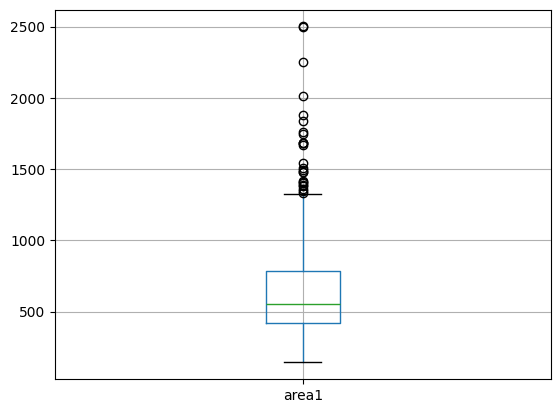

In [55]:
features.boxplot(column='area1')

<Axes: >

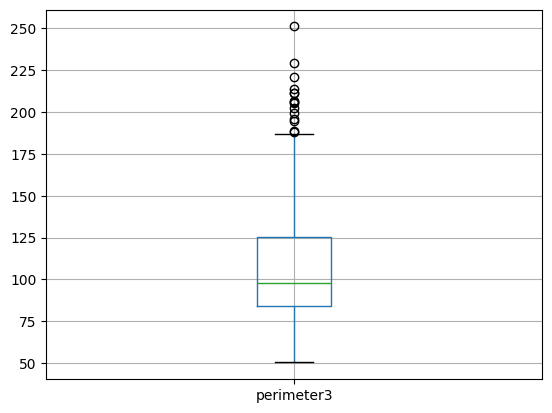

In [56]:
features.boxplot(column='perimeter3')

<Axes: >

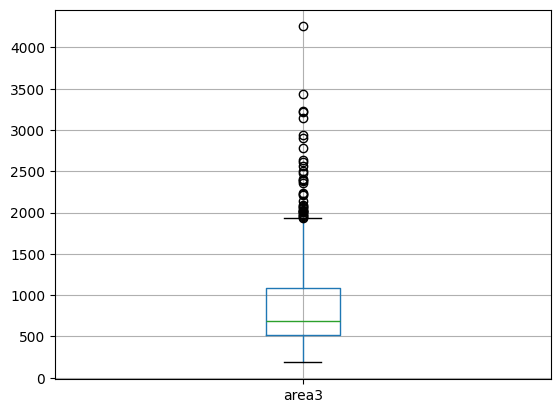

In [57]:
features.boxplot(column='area3')

# Data Wrangling

#### Area1

In [58]:
Q1_area1 = features.quantile(0.25)
Q3_area1 = features.quantile(0.75)

IQR = Q3_area1 - Q1_area1

# Define bounds for outliers
lower_bound = Q1_area1 - 1.5 * IQR
upper_bound = Q3_area1 + 1.5 * IQR

#Calc Men Value
mean_value_area1= features['area1'].mean()

In [59]:
features['area1'] = np.where(features['area1'] < lower_bound['area1'], mean_value_area1, features['area1'])
features['area1'] = np.where(features['area1'] > upper_bound['area1'], mean_value_area1, features['area1'])

/tmp/ipython-input-1638846440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['area1'] = np.where(features['area1'] < lower_bound['area1'], mean_value_area1, features['area1'])
/tmp/ipython-input-1638846440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['area1'] = np.where(features['area1'] > upper_bound['area1'], mean_value_area1, features['area1'])


#### perimeter3

In [60]:
Q1_perimeter3 = features.quantile(0.25)
Q3_perimeter3 = features.quantile(0.75)

IQR = Q3_perimeter3 - Q1_perimeter3

# Define bounds for outliers
lower_bound = Q1_perimeter3 - 1.5 * IQR
upper_bound = Q3_perimeter3 + 1.5 * IQR

In [61]:
median_value_perimeter3= features['perimeter3'].mean()

In [62]:
features['perimeter3'] = np.where(features['perimeter3'] < lower_bound['perimeter3'], median_value_perimeter3, features['perimeter3'])
features['perimeter3'] = np.where(features['perimeter3'] > upper_bound['perimeter3'], median_value_perimeter3, features['perimeter3'])

/tmp/ipython-input-3195894624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['perimeter3'] = np.where(features['perimeter3'] < lower_bound['perimeter3'], median_value_perimeter3, features['perimeter3'])
/tmp/ipython-input-3195894624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['perimeter3'] = np.where(features['perimeter3'] > upper_bound['perimeter3'], median_value_perimeter3, features['perimeter3'])


#### Area3

In [63]:
Q1_area3 = features.quantile(0.25)
Q3_area3 = features.quantile(0.75)

IQR = Q3_area3 - Q1_area3

# Define bounds for outliers
lower_bound = Q1_area3 - 1.5 * IQR
upper_bound = Q3_area3 + 1.5 * IQR

In [64]:
mean_value_area3= features['area3'].mean()

In [65]:
features['area3'] = np.where(features['area3'] < lower_bound['area3'], mean_value_area3, features['area3'])
features['area3'] = np.where(features['area3'] > upper_bound['area3'], mean_value_area3, features['area3'])

/tmp/ipython-input-2306290269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['area3'] = np.where(features['area3'] < lower_bound['area3'], mean_value_area3, features['area3'])
/tmp/ipython-input-2306290269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['area3'] = np.where(features['area3'] > upper_bound['area3'], mean_value_area3, features['area3'])


## Ater Wrangling

<Axes: >

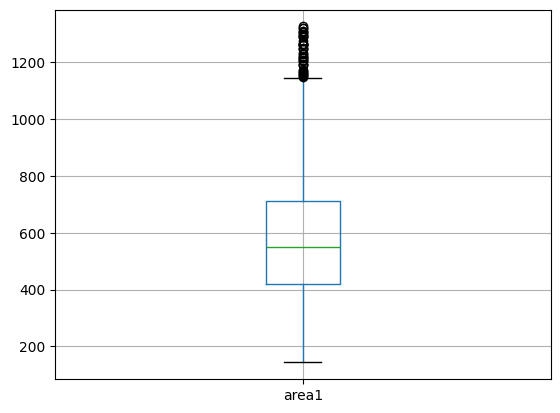

In [66]:
features.boxplot(column='area1')

<Axes: >

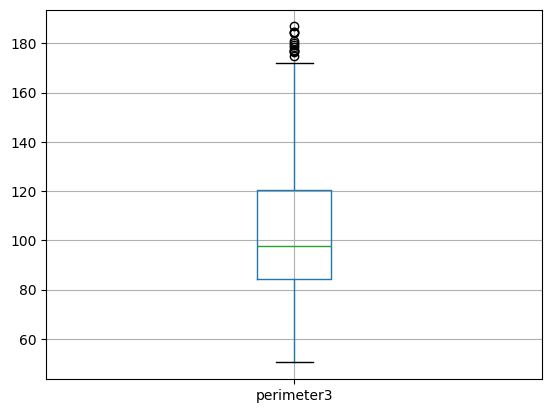

In [67]:
features.boxplot(column='perimeter3')

<Axes: >

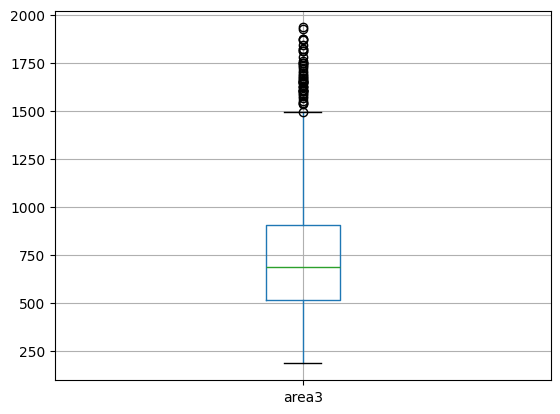

In [68]:
features.boxplot(column='area3')

# Normalization

# New Section

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [70]:
#fit and transform data
features2 = scaler.fit_transform(features)

In [71]:
features2 = pd.DataFrame(features2)

In [72]:
Features_2_np = scaler.fit_transform(features)

Features_2_df = pd.DataFrame(Features_2_np, columns=features.columns)

Features_2_df.describe().loc[['min', 'max']]

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
min,-2.029648,-2.229249,-1.984504,-1.745581,-3.112085,-1.610136,-1.114873,-1.26182,-2.744117,-1.819865,-1.059924,-1.554264,-1.044049,-0.737829,-1.776065,-1.298098,-1.057501,-1.913447,-1.532890,-1.096968,-1.726901,-2.223994,-1.865467,-1.553788,-2.682695,-1.443878,-1.305831,-1.745063,-2.160960,-1.601839
max,3.971288,4.651889,3.976130,2.676659,4.770911,4.568425,4.243589,3.92793,4.484751,4.910919,8.906909,6.655279,9.461986,11.041842,8.029999,6.143482,12.072680,6.649601,7.071917,9.851593,4.094189,3.885905,2.830179,2.974486,3.955374,5.112877,4.700669,2.685877,6.046041,6.846856


#

# encoding target

In [73]:
target =df.data.targets

In [74]:
target.sample(10)

,Diagnosis
259,M
177,M
437,B
541,B
219,M
441,M
196,M
226,B
515,B
554,B


In [75]:
target['Diagnosis']=np.where(target['Diagnosis']=='M',1,0)

/tmp/ipython-input-3165205371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Diagnosis']=np.where(target['Diagnosis']=='M',1,0)


In [76]:
target.sample(10)

,Diagnosis
132,1
277,1
171,1
182,1
168,1
408,1
139,0
384,0
177,1
398,0


# Modeling

In [77]:
features2.sample(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
523,-0.118517,-0.141869,-0.133416,-0.146843,0.199243,0.050392,-0.438788,-0.286033,-0.356400,0.798450,-0.310652,0.058325,-0.288137,-0.305539,-0.100664,-0.165888,-0.365845,0.279627,-0.223063,-0.018120,-0.240048,-0.007690,-0.177802,-0.21510,0.444119,0.014854,-0.377510,0.210032,-0.083729,0.352676
424,-1.245485,-0.039478,-1.237314,-1.198831,0.792763,-0.398189,-1.002707,-0.754452,2.651977,1.062124,1.051464,0.961868,0.861819,0.070030,2.009755,-0.370444,-0.857862,-0.207002,1.266203,0.162684,-1.047670,-0.408286,-1.129395,-1.04676,0.325762,-0.757420,-1.205802,-1.046314,0.477640,-0.213673


In [78]:
target.sample(2)

,Diagnosis
65,1
186,1


In [79]:
features.describe().loc[['min','max']]

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
min,6.981,9.71,43.79,143.5,0.05263,0.01938,0.0000,0.0000,0.106,0.04996,0.1115,0.3602,0.757,6.802,0.001713,0.002252,0.000,0.00000,0.007882,0.000895,7.93,12.02,50.41,185.2,0.07117,0.02729,0.000,0.000,0.1565,0.05504
max,28.110,39.28,188.50,1326.0,0.16340,0.34540,0.4268,0.2012,0.304,0.09744,2.8730,4.8850,21.980,542.200,0.031130,0.135400,0.396,0.05279,0.078950,0.029840,36.04,49.54,186.80,1933.0,0.22260,1.05800,1.252,0.291,0.6638,0.20750


In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features_2_df, target, test_size=0.2, shuffle=True)

In [81]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [82]:
model = SVC()
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [83]:
y_pred = model.predict(X_test)

In [84]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy : {round(accuracy*100, 2)}\n Precision : {round(precision*100,2)} \n Recall : {round(recall*100,2)}\n F1 Score : {round(f1*100,2)}')

Accuracy : 99.12
 Precision : 97.62 
 Recall : 100.0
 F1 Score : 98.8


In [85]:
cm=confusion_matrix(y_pred,y_test)

In [86]:
cm

array([[72,  0],
       [ 1, 41]])

In [87]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
    print('model saved')

model saved
